# Taller 4.
### Oscar Mejia
### 201516790 
*** 

In [180]:
%pylab inline
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import string
import matplotlib.cm as cm
import os
import random as rd
from scipy import ndimage
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter1d
import pandas as pd
from IPython.display import Markdown as md
from scipy.fftpack import fft, ifft,fftshift
from scipy.fftpack import fft, fftfreq
import scipy.io.wavfile as waves

Populating the interactive namespace from numpy and matplotlib


C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fft', 'ifft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 12.1 Bases de Serie de Fourier y la Transformada de Fourier

In [181]:
def sech(x):
    return 1/(math.cosh(x))

Ejercicio 1 
$$ f(x) = exp(-\alpha x^2) \rightarrow \hat{f}(k)= \frac{1}{\sqrt{2\alpha}}exp(\frac{-k^2}{4\alpha})$$  

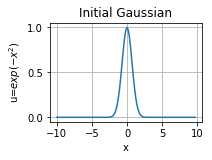

C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


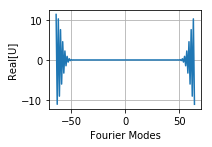

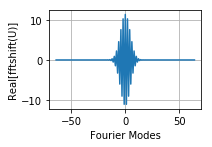

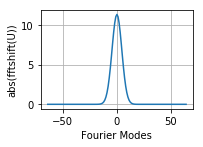

In [182]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n-1]
n2=linspace(-n/2,n/2,n-1)

x=np.array(x)
u=exp(-x*x)
ut=fft(u)
utshift=fftshift(ut)

plt.figure()
plt.subplot(2,2,1)
plt.plot(x,u)
plt.title('Initial Gaussian')
xlabel('x')
ylabel('u=$exp(-x^2)$')
grid(True)
show()

plt.subplot(2,2,2)
plt.plot(n2,ut)
xlabel('Fourier Modes')
ylabel('Real[U]')
grid(True)
show()

plt.figure()
plt.subplot(2,2,1)
plt.plot(n2,utshift)
xlabel('Fourier Modes')
ylabel('Real[fftshift(U)]')
grid(True)
show()


plt.subplot(2,2,2)
plt.plot(n2,abs(utshift))
xlabel('Fourier Modes')
ylabel('abs(fftshift(U))')
grid(True)
show()

** Ejercicio 2**  

Calcular  la derivada de una funcion con el uso del FFT  
$$ u(x)= sech(x) $$
$$ \frac{du}{dt}=-sech(x)tanh(x) $$
$$ \frac{d^2u}{dt^2}=sech(x)-2sech^3(x) $$

C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':
C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


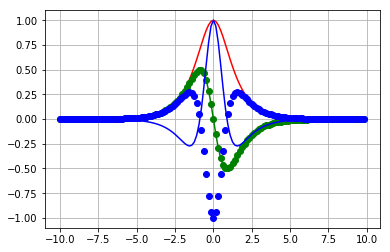

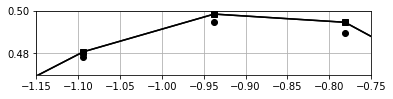

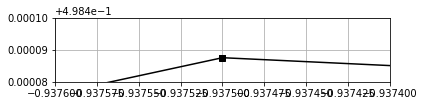

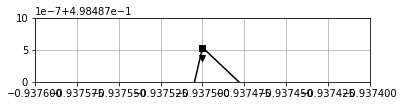

In [183]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]
dx = x[2]-x[1]
u=[]
for i, k in enumerate(x):
    u.append(sech(k))
u=np.array(u)

ut=fft(u)
ik=np.linspace(0,n/2-1,n/2)
ik2=np.linspace(-n/2,-1,n/2)
ik=np.array(np.concatenate((ik,ik2)))
k = (2j*np.pi/L)* ik

#Calculo de derivadas con FFT
ut1=k*ut
ut2=-k*k*ut
u1 =ifft(ut1).real
u2=ifft(ut2).real
u1exact=[]
u2exact=[]
ux=[]
for i, x1 in enumerate(x):
    u1exact.append(-sech(x1)*math.tanh(x1))
    u2exact.append(sech(x1)-2*(sech(x1))**3)
u1exact=np.array(u1exact)
u2exact=np.array(u2exact)
# Calculo de 1 derivada por diferencias finitas
# 2 orden acierto
t=-3*u[0]+4*u[1]-u[2]/(2*dx)
ux.append(t)
for t in range(1,n-1):
         ux.append((u[t+1]-u[t-1])/(2*dx))        
ux.append((-3*u[n-1]+4*u[n-2]-u[n-3])/(2*dx) )
ux=np.array(ux)

# 4th-order acurrate
ux2=[]
ux2.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2.append((-3*u[1]+4*u[2]-u[3])/(2*dx))
for j in range(1,n-2):
    a=(-u[j+2]+8*u[j+1]-8*[j-1]+u[j-2])/(12*dx)
    ux2.append(a[0])
ux2.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))

ux2=np.array(ux2)
#Figura 1
figure()
plot(x,u,'r',x,u1,'g',x,u1exact,'go',x,u2,'b',x,u2exact,'bo')
grid(True)

plt.figure()
grid(True)
plt.subplot(3,1,1)
plt.plot(x,u1exact,'ks-')
plot(x,u1,'k')
grid(True)
plot(x,ux,'ko')
plot(x,ux2,'k*')
xlim(-1.15, -0.75)
ylim(0.47 ,0.5)
show()

plt.subplot(3,1,2)
plot(x,u1exact,'ks-')
plot(x,u1,'kv')
plot(x,ux,'ko')
grid(True)
plot(x,ux2,'k*')
xlim(-0.9376, -0.9374)
ylim(0.49848, 0.49850)
show()

plt.subplot(3,1,3)
plot(x,u1exact,'ks-')
plot(x,u1,'kv')
plot(x,ux,'ko')
grid(True)
plot(x,ux2,'k*')
xlim(-0.9376, -0.9374)
ylim(0.498487, 0.498488)
show()

## 12.2   APLICACIONES DEL FFT: DETECTION DE RADAR Y FILTRADO

C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """
C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


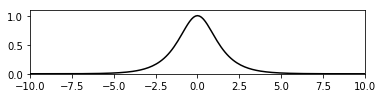

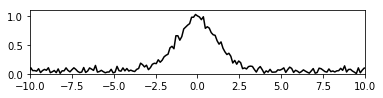

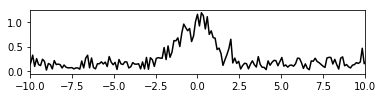

In [184]:
L = 30
n=512
t2 =linspace(-L,L,n+1)
t=t2[0:n]
ik=np.linspace(0,n/2-1,n/2)
ik2=np.linspace(-n/2,-1,n/2)
ik=np.array(np.concatenate((ik,ik2)))

k=(2*np.pi/(2*L))*(ik)
u=1/cosh(t) # Señal ideal en el tiempo

noise=1
ut=fft(u)
r=[]
im=[]
for i in range(0,n):
    r.append(random.randn())
    im.append(1j*random.randn())
r=np.array(r)
im=np.array(im)
utn=ut+noise*(r)+noise*(im)
un =ifft(utn)

figure()
title('Figure 82')
subplot(3,1,1)
plot(t,u,'k')
xlim(-10, 10)
ylim(0, 1.1)
show()

subplot(3,1,2)
plot(t,abs(un),'k')
xlim(-10, 10)
ylim(0, 1.1)
show()

noise=3
ut=fft(u)
r=[]
im=[]
for i in range(0,n):
    r.append(random.randn())
    im.append(1j*random.randn())
r=np.array(r)
im=np.array(im)

unt=ut+noise*(r)+noise*(im)
un =ifft(unt)

subplot(3,1,3)
plot(t,abs(un),'k')
xlim(-10, 10)
show()

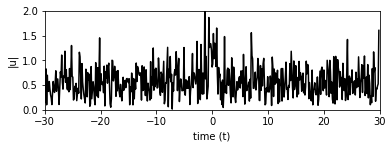

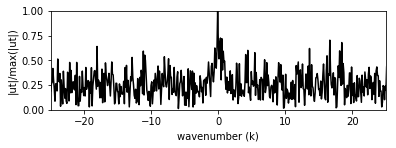

In [185]:
noise=10
ut=fft(u)
r=[]
im=[]
for i in range(0,n):
    r.append(random.randn())
    im.append(1j*random.randn())
r=np.array(r)
im=np.array(im)
unt=ut+noise*(r)+noise*(im)
un =ifft(unt)

figure
plt.title('figure 83')
subplot(2,1,1)
plot(t,abs(un),'k')
xlim(-30, 30)
ylim(0, 2)
xlabel('time (t)')
ylabel('|u|')
show()

subplot(2,1,2)
plot(fftshift(k),abs(fftshift(unt))/max(abs(fftshift(unt))),'k')
xlim(-25, 25)
ylim(0, 1)
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
show()


$$F (k) = exp(-\tau(k-k_o)^2)$$

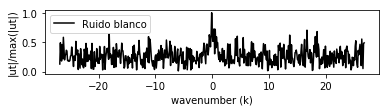

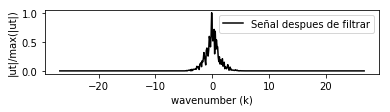

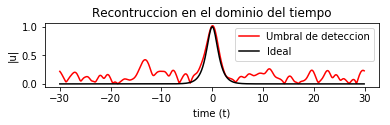

In [186]:
filtro=exp(-0.2*(k**2))
unft=filtro*unt
unf=ifft(unft)

figure()
subplot(3,1,1)
plot(fftshift(k),abs(fftshift(unt))/max(abs(fftshift(unt))),'k',label='Ruido blanco')
#plot(t,u,'r',label='Ideal')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
legend(loc='best')
show()

plt.title('figure 83')
subplot(3,1,2)
plot(fftshift(k),abs(fftshift(unft))/max(abs(fftshift(unft))),'k',label='Señal despues de filtrar')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
legend(loc='best')
show()

plt.title('figure 83')
subplot(3,1,3)
plot(t,abs(unf),'r',label='Umbral de deteccion')
plot(t,abs(u),'k',label='Ideal')
xlabel('time (t)')
ylabel('|u|')
title('Recontruccion en el dominio del tiempo')
legend(loc='best')
show()


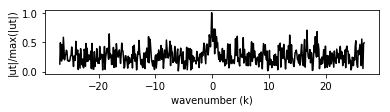

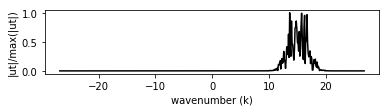

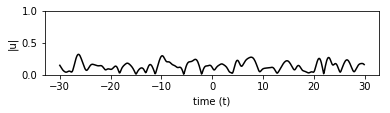

In [187]:
filtro=exp(-0.2*((k-15)**2))
unft=filtro*unt
unf=ifft(unft)

figure


subplot(3,1,1)
plot(fftshift(k),abs(fftshift(unt))/max(abs(fftshift(unt))),'k')
#plot(np.fft.fftshift(k),np.fft.fftshift(u)/max(abs(np.fft.fftshift(u))),'r')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
show()

plt.title('figure 83')
subplot(3,1,2)
plot(fftshift(k),abs(fftshift(unft))/max(abs(fftshift(unft))),'k')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
show()

plt.title('figure 83')
subplot(3,1,3)
plot(t,abs(unf),'k')
xlabel('time (t)')
ylabel('|u|')
ylim(0,1)
show()


## 12.3 Aplicaciones de FFT: Deteccion de radar y promedio

In [188]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=t2[0:n-1]
t=np.array(t)

ik=np.linspace(0,n/2-1,n/2)
ik2=np.linspace(-n/2,-1,n/2-1)
ik=np.array(np.concatenate((ik,ik2)))

C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys
C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part


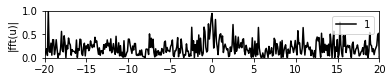

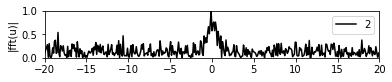

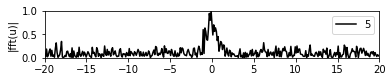

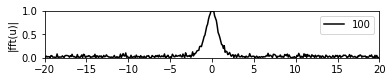

C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


Text(0.5,0,'frequency (k)')

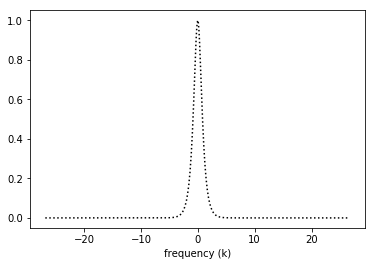

In [189]:


k=(2*np.pi/(2*L))*(ik)
ks=fftshift(k)
noise = 10

labels=np.array(['(a)','(b)','(c)','(d)'])
realize = np.array([1,2,5,100])


for jj, b in enumerate(realize):        
        u=1/cosh(t)
        utn=np.zeros((b,n-1))
        ave=np.zeros((1,n-1))    
        
        ut=fft(u) 
        dat=np.zeros((b,n-1))
        un=np.zeros((b,n-1))
        
        for j in range(0,b): 
            r=[]
            im=[]


            for i in range(0,n-1):
                r.append(random.randn())
                im.append(1j*random.randn())

            r=np.array(r)
            im=np.array(im)
            utn[j,:]= ut + noise*(r + im)
            ave=ave+utn[j,:]
          
            dat[j,:]= abs(fftshift(utn[j,:]))/(max(abs(utn[j,:])))     
            un[j,:]=ifft(utn[j,:])
            
        ave=abs(fftshift(ave))/b
      
        subplot(4,1,jj+1)
        plot(ks,ave[0,:]/max(ave[0,:]),'k',label=b)
        
        xlim(-20, 20)
        ylim(0, 1)
        
        legend(loc='upper right')
        ylabel('|fft(u)|')
        show()
        
hold(True)        
plot(ks,abs(np.fft.fftshift(ut))/max(abs(ut)),'k:')
xlabel('frequency (k)')




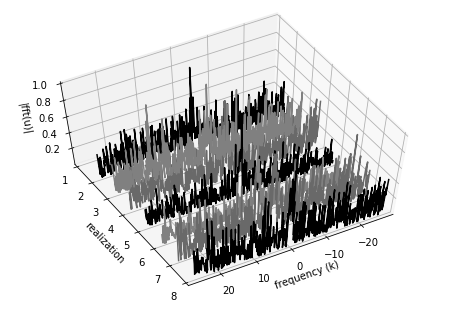

In [190]:
fig =figure(num=2)
ax=Axes3D(fig)
y=np.array([1,2,3,4,5,6,7,8,9])
X,Y =meshgrid(ks,y)
p=ax.contour(X,Y, dat[0:9,:],zdir='y',extend3d=False,colors=('black', 'gray', 'dimgray'))
xlabel('frequency (k)')
ylabel('realization')
xlim(-28,28)
ylim(1,8)
ax.set_zlabel('|fft(u)|')
ax.view_init(60,60)

C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1714: ComplexWarning: Casting complex values to real discards the imaginary part
  v1[which_pt] = np.array(ps2[i1]) - np.array(ps2[i2])
C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1715: ComplexWarning: Casting complex values to real discards the imaginary part
  v2[which_pt] = np.array(ps2[i2]) - np.array(ps2[i3])
C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real d

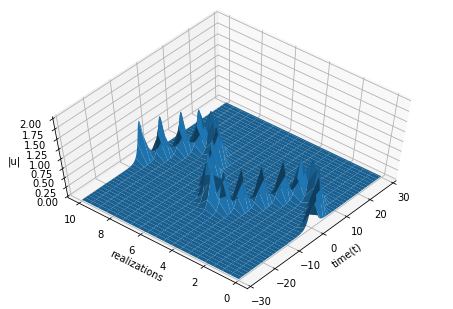

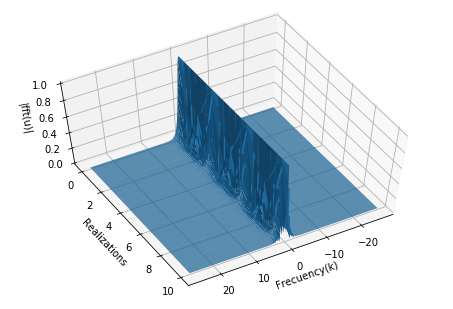

In [191]:
sl=linspace(0,10,10/0.5)
[T,S]=meshgrid(t,sl)
[K,S]=meshgrid(k,sl)
U=1/(cosh(T-10*np.sin(S))) *exp(1j*0*T)


fig =figure(num=3)
subplot(2,1,1)
ax=Axes3D(fig)
ax.plot_surface(T,S,U)
xlabel('time(t)')
ylabel('realizations')
ax.set_zlabel('|u|')
xlim([-30,30])
ax.set_zlim(0,2)
ax.view_init( 60,-500)

Ut=zeros((20,511))
Kp=zeros((20,511))
Utp=zeros((20,511))
Utn=zeros((20,511))
Utnp=zeros((20,511))
Un=zeros((20,511))

for v in range(0,len(s)):
    r=[]
    im=[]
    for i in range(0,n-1):
         r.append(random.randn())
         im.append(1j*random.randn())
    r=np.array(r)
    im=np.array(im)    
    Ut[v,:] =fft(U[v,:])
    Kp[v,:]=fftshift(K[v,:])
    Utp[v,:] =fftshift(Ut[v,:])
    Utn[v,:]= Ut[v,:] + noise*(r+im)
    Utnp[v,:]=fftshift(Utn[v,:])/max(abs(Utn[v,:]))
    Un[v,:]=ifft(Utn[v,:])
    
fig =figure()
subplot(2,1,2)
ax=Axes3D(fig)
ax.plot_surface(Kp,S, abs(Utp)/max(abs(Utp[0,:])),rstride=1,cstride=1)
xlabel('time(t)')
ylabel('realizations')
ax.set_zlabel('|fft(u)|')
xlim([-28,28])
ax.set_zlim(0,1)
xlabel('Frecuency(k)')
ylabel('Realizations')
ax.view_init( 60,60)

    

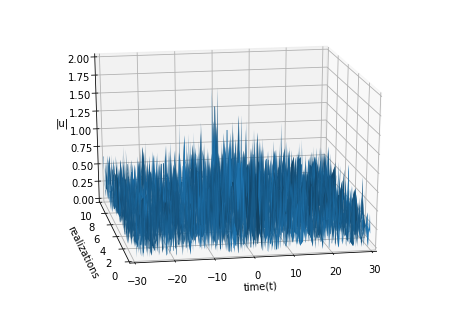

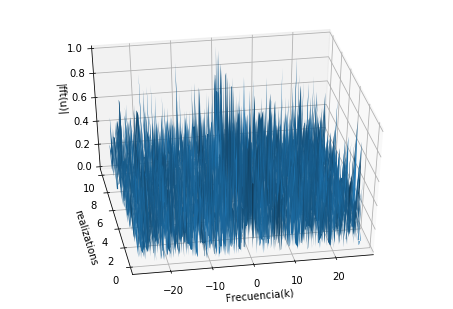

In [192]:
fig =figure(num=4)
subplot(2,1,1)
ax=Axes3D(fig)
ax.plot_surface(T,S, abs(Un))
xlabel('time(t)')
ylabel('realizations')
xlim(-30,30)
ylim(0,10)
ax.set_zlabel('|u|')
ax.view_init( 20,-100)
ax.set_zlim(0,2)
show()

fig =figure()
subplot(2,1,2)
ax=Axes3D(fig)

ax.plot_surface(Kp,S, abs(Utnp))
xlabel('Frecuencia(k)')
ylabel('realizations')
ax.set_zlabel('|fft(u)|')
xlim(-28,28)
ax.view_init( 40,-100)
ax.set_zlim(0,1)
show()


C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\Eduardo\Pictures\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


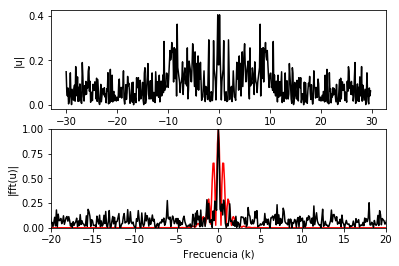

In [193]:
figure(num=5)
Uave = zeros((1,n-1))    
Utave= zeros((1,n-1))
for j in range(0,len(s)):
    Uave= Uave+Un[j,:]
    Utave=Utave+Utn[j,:]
    
Uave=Uave/len(s)
Utave=fftshift(Utave)/len(s)

subplot(2,1,1)
plot(t,abs(Uave[0,:]),'k')
xlabel('time (t)')
ylabel('|u|')
show
 
subplot(2,1,2)
plot(ks,abs(fftshift(Ut[1,:]))/max(abs(Ut[1,:])),'r-')
hold(True)
plot(ks,abs(Utave[0,:])/max(abs(Utave[0,:])),'k')
xlim(-20,20)
ylim(0,1)
xlabel('Frecuencia (k)')
ylabel('|fft(u)|')
show()

## Ejemplo Personal 
Para este ejemplo se filtrara las frecuencias de voz de la cancion Amigo de Los enanitos verdes.
***
Para este ejercicio particular se usaron las sigueintes herramientas:
* Scipy.waves
* Scipy.fft
* Fitro butter pasabandas

In [194]:
archivo = 'Amigo.wav'
muestreo, sonido = waves.read(archivo)
tamano = np.shape(sonido)
muestras = tamano[0]
m = len(tamano)
canales = 1  # monofónico
if (m>1):  # estéreo
    canales = tamano[1]
# experimento con un canal
if (canales>1):
    canal = 0
    uncanal = sonido[:,canal] 
else:
    uncanal = sonido
# rango de observación en segundos
inicia = 0.000
termina = 2*60+54
# observación en número de muestra
a = int(inicia*muestreo)
b = int(termina*muestreo)
parte = uncanal[a:b]

In [195]:
from scipy.signal import butter, lfilter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def espectro(y):
    n4 = len(y) # longitud de la señal

    k = arange(n4)
    Fs= muestreo
    ll = n4/Fs

    frq = k/ll # 2 lados del rango de frecuancia
    for i in range(0,n4):
        if i>n4/2:
            frq[i]=0
    #frq = frq[arange(n/2)] # Un lado del rango de frecuencia
    Y = fft(y)/n4 # fft calcula la normalizacion
    for i in range(0,n4):
        if i>n4/2:
           Y[i]=0

    #Y = Y[arange(n/2)]
    figure()
    plot(frq,abs(Y)/max(abs(Y)),'k') # grafica el espectro de frecuencia

    xlabel('Frecuencia (Hz)')
    ylabel('|Y(f)|')
    xlim(0,1500)

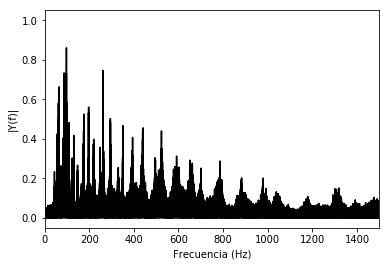

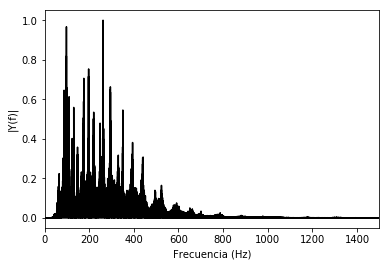

In [196]:
b, a = butter_bandpass(90, 392, muestreo, order=3)
z = lfilter(b, a, sonido[:,0])
espectro(sonido[:,0])
espectro(z)

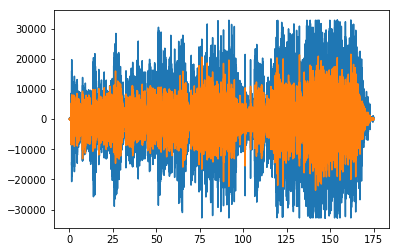

In [197]:
tx=linspace(0,2*60+55,len(z))
plot(tx,sonido[:,0])
plot(tx,z)

A continuacion se filtrara el espectro de la guitarra

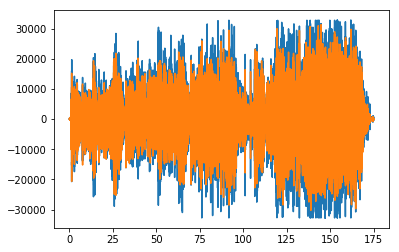

In [198]:
b, a = butter_bandpass(82, 988, Fs, order=3)
z = lfilter(b, a, sonido[:,0])
plot(tx,sonido[:,0])
plot(tx,z)